In [1]:
def f(x):
    return x**2


print(f(3))

9


In [2]:
def dfdx(x):
    return 2 * x


print(dfdx(3))

6


In [3]:
import numpy as np

x_array = np.array([1, 2, 3])

print("x: \n", x_array)
print("f(x) = x**2: \n", f(x_array))
print("f'(x) = 2x: \n", dfdx(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]
f'(x) = 2x: 
 [2 4 6]


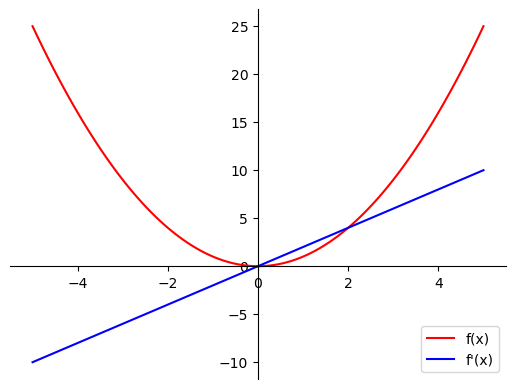

In [4]:
import matplotlib.pyplot as plt

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

def plot_f1_and_f2(f1, f2=None, x_min=-5, x_max=5, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max,100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f1(x), 'r', label=label1)
    if not f2 is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.        
        if isinstance(f2, np.ndarray):
            plt.plot(x, f2, 'bo', markersize=3, label=label2,)
        else:
            plt.plot(x, f2(x), 'b', label=label2)
    plt.legend()

    plt.show()
    
plot_f1_and_f2(f, dfdx)

In [5]:
import math

math.sqrt(18)

4.242640687119285

In [6]:
!pip install sympy

In [7]:
# This format of module import allows to use the sympy functions without sympy. prefix.
from sympy import *

# This is actually sympy.sqrt function, but sympy. prefix is omitted.
sqrt(18)

3*sqrt(2)

In [8]:
N(sqrt(18),8)

4.2426407

In [9]:
# List of symbols.
x, y = symbols("x y")
# Definition of the expression.
expr = 2 * x**2 - x * y
expr

2*x**2 - x*y

In [10]:
expr_manip = x * (expr + x * y + x**3)
expr_manip

x*(x**3 + 2*x**2)

In [11]:
expand(expr_manip)

x**4 + 2*x**3

In [12]:
factor(expr_manip)

x**3*(x + 2)

In [13]:
expr.evalf(subs={x:-1, y:2})

4.00000000000000

In [14]:
f_symb = x ** 2
f_symb.evalf(subs={x:3})

9.00000000000000

In [15]:
print(x_array)

[1 2 3]


In [16]:
try:
    f_symb(x_array)
except TypeError as err:
    print(err)

'Pow' object is not callable


In [17]:
from sympy.utilities.lambdify import lambdify

f_symb_numpy = lambdify(x, f_symb, "numpy")

In [18]:
print("x: \n", x_array)
print("f(x) = x**2: \n", f_symb_numpy(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]


In [19]:
diff(x**3, x)

3*x**2

In [20]:
dfdx_composed = diff(exp(-2 * x) + 3 * sin(3 * x), x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

In [21]:
dfdx_symb = diff(f_symb, x)
dfdx_symb_numpy = lambdify(x, dfdx_symb, "numpy")

In [22]:
print("x: \n", x_array)
print("f'(x) = 2x: \n", dfdx_symb_numpy(x_array))

x: 
 [1 2 3]
f'(x) = 2x: 
 [2 4 6]


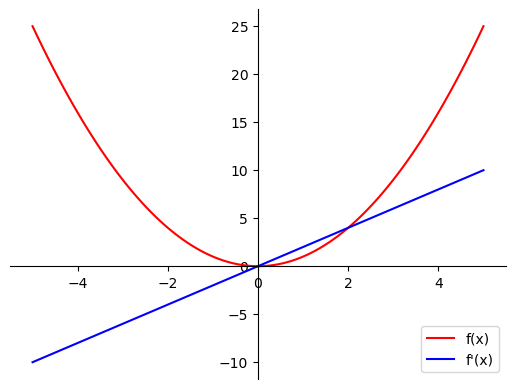

In [23]:
plot_f1_and_f2(f_symb_numpy, dfdx_symb_numpy)

In [24]:
dfdx_abs = diff(abs(x), x)
dfdx_abs

(re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*sign(x)/x

In [25]:
dfdx_abs.evalf(subs={x: -2})

-Subs(Derivative(re(x), x), x, -2)

In [26]:
dfdx_abs_numpy = lambdify(x, dfdx_abs, "numpy")

try:
    dfdx_abs_numpy(np.array([1, -2, 0]))
except NameError as err:
    print(err)

name 'Derivative' is not defined


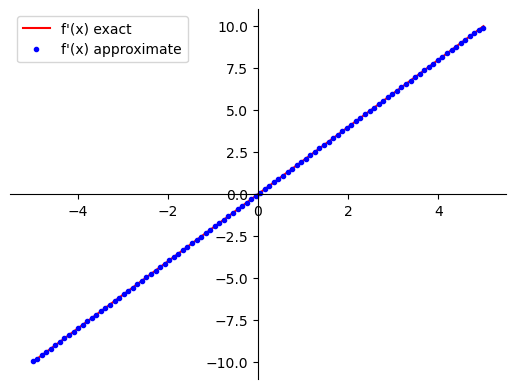

In [27]:
x_array_2 = np.linspace(-5, 5, 100)
dfdx_numerical = np.gradient(f(x_array_2), x_array_2)

plot_f1_and_f2(
    dfdx_symb_numpy, dfdx_numerical, label1="f'(x) exact", label2="f'(x) approximate"
)

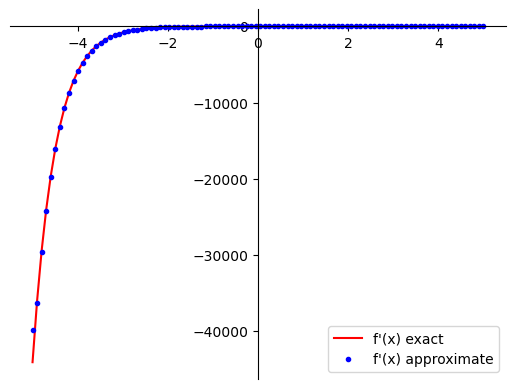

In [28]:
def f_composed(x):
    return np.exp(-2 * x) + 3 * np.sin(3 * x)


plot_f1_and_f2(
    lambdify(x, dfdx_composed, "numpy"),
    np.gradient(f_composed(x_array_2), x_array_2),
    label1="f'(x) exact",
    label2="f'(x) approximate",
)

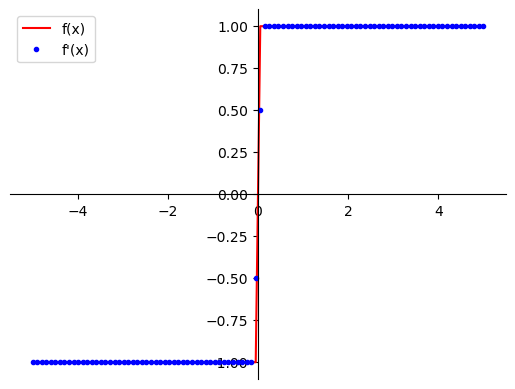

In [29]:
def dfdx_abs(x):
    if x > 0:
        return 1
    else:
        if x < 0:
            return -1
        else:
            return None


plot_f1_and_f2(np.vectorize(dfdx_abs), np.gradient(abs(x_array_2), x_array_2))

In [30]:
from jax import grad, vmap
import jax.numpy as jnp

In [31]:
x_array_jnp = jnp.array([1.0, 2.0, 3.0])

print("Type of NumPy array:", type(x_array))
print("Type of JAX NumPy array:", type(x_array_jnp))
# Please ignore the warning message if it appears.

Type of NumPy array: <class 'numpy.ndarray'>
Type of JAX NumPy array: <class 'jaxlib.xla_extension.ArrayImpl'>


In [32]:
x_array_jnp = jnp.array(x_array.astype("float32"))
print("JAX NumPy array:", x_array_jnp)
print("Type of JAX NumPy array:", type(x_array_jnp))

JAX NumPy array: [1. 2. 3.]
Type of JAX NumPy array: <class 'jaxlib.xla_extension.ArrayImpl'>


In [33]:
print(x_array_jnp * 2)
print(x_array_jnp[2])

[2. 4. 6.]
3.0


In [34]:
try:
    x_array_jnp[2] = 4.0
except TypeError as err:
    print(err)

'<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html


In [35]:
y_array_jnp = x_array_jnp.at[2].set(4.0)
print(y_array_jnp)

[1. 2. 4.]


In [36]:
print(jnp.log(x_array))
print(jnp.log(x_array_jnp))

[0.        0.6931472 1.0986123]
[0.        0.6931472 1.0986123]


In [37]:
print("Function value at x = 3:", f(3.0))
print("Derivative value at x = 3:", grad(f)(3.0))

Function value at x = 3: 9.0
Derivative value at x = 3: 6.0


In [38]:
try:
    grad(f)(3)
except TypeError as err:
    print(err)

grad requires real- or complex-valued inputs (input dtype that is a sub-dtype of np.inexact), but got int32. If you want to use Boolean- or integer-valued inputs, use vjp or set allow_int to True.


In [39]:
try:
    grad(f)(x_array_jnp)
except TypeError as err:
    print(err)

Gradient only defined for scalar-output functions. Output had shape: (3,).


In [40]:
dfdx_jax_vmap = vmap(grad(f))(x_array_jnp)
print(dfdx_jax_vmap)

[2. 4. 6.]


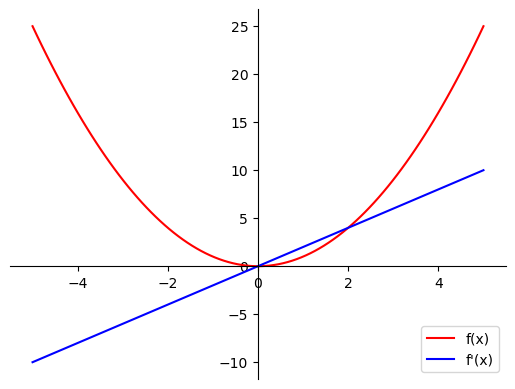

In [41]:
plot_f1_and_f2(f, vmap(grad(f)))

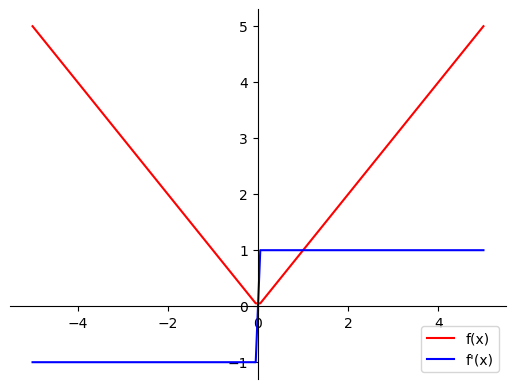

In [42]:
def g(x):
    #     return x**3
    #     return 2*x**3 - 3*x**2 + 5
    #     return 1/x
    #     return jnp.exp(x)
    #     return jnp.log(x)
    #     return jnp.sin(x)
    #     return jnp.cos(x)
    return jnp.abs(x)


#     return jnp.abs(x)+jnp.sin(x)*jnp.cos(x)

plot_f1_and_f2(g, vmap(grad(g)))

In [43]:
import timeit, time

x_array_large = np.linspace(-5, 5, 1000000)

tic_symb = time.time()
res_symb = lambdify(x, diff(f(x), x), "numpy")(x_array_large)
toc_symb = time.time()
time_symb = 1000 * (toc_symb - tic_symb)  # Time in ms.

tic_numerical = time.time()
res_numerical = np.gradient(f(x_array_large), x_array_large)
toc_numerical = time.time()
time_numerical = 1000 * (toc_numerical - tic_numerical)

tic_jax = time.time()
res_jax = vmap(grad(f))(jnp.array(x_array_large.astype("float32")))
toc_jax = time.time()
time_jax = 1000 * (toc_jax - tic_jax)

print(
    f"Results\nSymbolic Differentiation:\n{res_symb}\n"
    + f"Numerical Differentiation:\n{res_numerical}\n"
    + f"Automatic Differentiation:\n{res_jax}"
)

print(
    f"\n\nTime\nSymbolic Differentiation:\n{time_symb} ms\n"
    + f"Numerical Differentiation:\n{time_numerical} ms\n"
    + f"Automatic Differentiation:\n{time_jax} ms"
)

Results
Symbolic Differentiation:
[-10.       -9.99998  -9.99996 ...   9.99996   9.99998  10.     ]
Numerical Differentiation:
[-9.99999 -9.99998 -9.99996 ...  9.99996  9.99998  9.99999]
Automatic Differentiation:
[-10.       -9.99998  -9.99996 ...   9.99996   9.99998  10.     ]


Time
Symbolic Differentiation:
2.9990673065185547 ms
Numerical Differentiation:
44.68393325805664 ms
Automatic Differentiation:
67.22879409790039 ms


In [44]:
def f_polynomial_simple(x):
    return 2 * x**3 - 3 * x**2 + 5


def f_polynomial(x):
    for i in range(3):
        x = f_polynomial_simple(x)
    return x


tic_polynomial_symb = time.time()
res_polynomial_symb = lambdify(x, diff(f_polynomial(x), x), "numpy")(x_array_large)
toc_polynomial_symb = time.time()
time_polynomial_symb = 1000 * (toc_polynomial_symb - tic_polynomial_symb)

tic_polynomial_jax = time.time()
res_polynomial_jax = vmap(grad(f_polynomial))(
    jnp.array(x_array_large.astype("float32"))
)
toc_polynomial_jax = time.time()
time_polynomial_jax = 1000 * (toc_polynomial_jax - tic_polynomial_jax)

print(
    f"Results\nSymbolic Differentiation:\n{res_polynomial_symb}\n"
    + f"Automatic Differentiation:\n{res_polynomial_jax}"
)

print(
    f"\n\nTime\nSymbolic Differentiation:\n{time_polynomial_symb} ms\n"
    + f"Automatic Differentiation:\n{time_polynomial_jax} ms"
)

Results
Symbolic Differentiation:
[2.88570423e+24 2.88556400e+24 2.88542377e+24 ... 1.86202587e+22
 1.86213384e+22 1.86224181e+22]
Automatic Differentiation:
[2.8857043e+24 2.8855642e+24 2.8854241e+24 ... 1.8620253e+22 1.8621349e+22
 1.8622416e+22]


Time
Symbolic Differentiation:
387.0260715484619 ms
Automatic Differentiation:
205.1236629486084 ms
